# Práctica 4: transformación de datos numéricos


## Dataframe 3: Precio de carros usados


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
train = pd.read_csv('C:/Users/HP/Downloads/train3.csv')
train.shape

(6019, 14)

In [4]:
test = pd.read_csv('C:/Users/HP/Downloads/test3.csv')
test.shape

(1234, 13)

### Transformación de variables numéricas


In [5]:
train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [10]:
test['Kilometers_Driven'] = test['Kilometers_Driven'].astype(float)
test_data = test[['Kilometers_Driven']]
train['Kilometers_Driven'] = train['Kilometers_Driven'].astype(float)
train_data = train[['Kilometers_Driven']]

#### Estandarización


In [11]:
scaler = StandardScaler()
scaler.fit(train_data)

print("train:\n", train_data.head(10))
print("\ntest:\n", test_data.head(10))

print("Transformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

print("\nMedia:", scaler.mean_)
print("\nDesviación Estándar:", scaler.var_)

train:
    Kilometers_Driven
0            72000.0
1            41000.0
2            46000.0
3            87000.0
4            40670.0
5            75000.0
6            86999.0
7            36000.0
8            64430.0
9            65932.0

test:
    Kilometers_Driven
0            40929.0
1            54493.0
2            34000.0
3           139000.0
4            29000.0
5            85609.0
6            59000.0
7            65000.0
8            66000.0
9            54684.0
Transformación train:
           0
0  0.145315
1 -0.194369
2 -0.139581
3  0.309678
4 -0.197985
5  0.178188
6  0.309667
7 -0.249157
8  0.062366
9  0.078824

Transformación test:
           0
0 -0.195147
1 -0.046519
2 -0.271072
3  0.879471
4 -0.325860
5  0.294436
6  0.002867
7  0.068612
8  0.079570
9 -0.044426

Media: [58738.38029573]

Desviación Estándar: [8.32861779e+09]


####  Escala min-max 

In [12]:
from sklearn.preprocessing import MinMaxScaler

print("train:\n", train_data.head(10))
print("test:\n", test_data.head(10))

scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head(10))
print("\nTransformación test:\n", pd.DataFrame(scaler.transform(test_data)).head(10))

train:
    Kilometers_Driven
0            72000.0
1            41000.0
2            46000.0
3            87000.0
4            40670.0
5            75000.0
6            86999.0
7            36000.0
8            64430.0
9            65932.0
test:
    Kilometers_Driven
0            40929.0
1            54493.0
2            34000.0
3           139000.0
4            29000.0
5            85609.0
6            59000.0
7            65000.0
8            66000.0
9            54684.0

Transformación train:
           0
0  0.011051
1  0.006282
2  0.007051
3  0.013359
4  0.006231
5  0.011512
6  0.013359
7  0.005512
8  0.009886
9  0.010117

Transformación test:
           0
0  0.006271
1  0.008357
2  0.005205
3  0.021359
4  0.004435
5  0.013145
6  0.009051
7  0.009974
8  0.010128
9  0.008387


La variable Fare parece tener un outlier en 500

In [14]:
train_data = train[['Kilometers_Driven']] # Data including outlier.
scaler = MinMaxScaler()
scaler.fit(train_data)
print("\nTransformación train:\n", pd.DataFrame(scaler.transform(train_data)).head())


Transformación train:
           0
0  0.011051
1  0.006282
2  0.007051
3  0.013359
4  0.006231


#### Transformación logarítmica


Antes de la transformación logarítmica el histograma de Fare se ve así

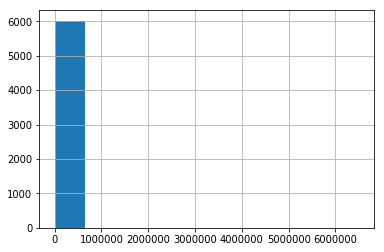

In [15]:
train.Kilometers_Driven.hist()
plt.show()

In [16]:
print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(np.log1p(train_data)).head(10))

Train:
    Kilometers_Driven
0            72000.0
1            41000.0
2            46000.0
3            87000.0
4            40670.0
5            75000.0
6            86999.0
7            36000.0
8            64430.0
9            65932.0

Transformación train:
    Kilometers_Driven
0          11.184435
1          10.621352
2          10.736418
3          11.373675
4          10.613271
5          11.225257
6          11.373663
7          10.491302
8          11.073350
9          11.096394


Después de la transformación:

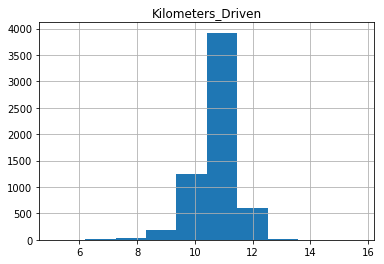

In [17]:
pd.DataFrame(np.log1p(train_data)).hist()
plt.show()

#### Transformación de Box-Cox

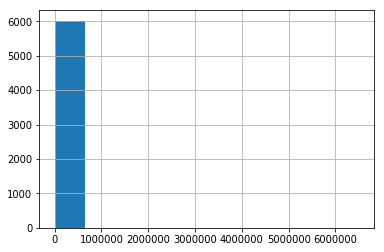

In [18]:
train.Kilometers_Driven.hist()
plt.show()

In [19]:
from sklearn.preprocessing import PowerTransformer

train_data = train[['Kilometers_Driven']]

pt = PowerTransformer(method='box-cox')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("Train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambda:", pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación Estándar:", np.std(train_data_trans))

Train:
    Kilometers_Driven
0            72000.0
1            41000.0
2            46000.0
3            87000.0
4            40670.0
5            75000.0
6            86999.0
7            36000.0
8            64430.0
9            65932.0

Transformación train:
           0
0  0.574791
1 -0.297100
2 -0.129509
3  0.898768
4 -0.308676
5  0.643288
6  0.898747
7 -0.480367
8  0.392163
9  0.429601

Lambda: [0.2692279]

Media: 3.742183871672234e-16

Desviación Estándar: 1.0


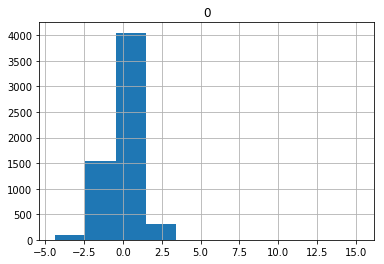

In [20]:
pd.DataFrame(train_data_trans).hist()
plt.show()

#### Transformación Yeo-Johnson

In [21]:
train_data = train[['Kilometers_Driven']]

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data.head(10))
print("\nTransformación train:\n", pd.DataFrame(train_data_trans).head(10))

print("\nLambdas:",pt.lambdas_) # Automatically selected 
print("\nMedia:", np.mean(train_data_trans)) 
print("\nDesviación estándar:", np.std(train_data_trans))

train:
    Kilometers_Driven
0            72000.0
1            41000.0
2            46000.0
3            87000.0
4            40670.0
5            75000.0
6            86999.0
7            36000.0
8            64430.0
9            65932.0

Transformación train:
           0
0  0.574799
1 -0.297100
2 -0.129507
3  0.898776
4 -0.308677
5  0.643296
6  0.898756
7 -0.480371
8  0.392169
9  0.429608

Lambdas: [0.26919472]

Media: 2.3934630283329507e-16

Desviación estándar: 1.0


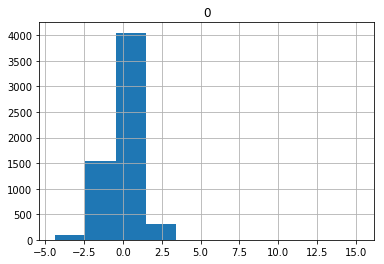

In [22]:
pd.DataFrame(train_data_trans).hist()
plt.show()

#### Recorte

In [23]:
df= train[['Kilometers_Driven', 'Year']]

p25 = df.quantile(0.25)
p75 = df.quantile(0.75)
print("p25:\n", p25)
print("p75:\n", p75)

p25:
 Kilometers_Driven    34000.0
Year                  2011.0
Name: 0.25, dtype: float64
p75:
 Kilometers_Driven    73000.0
Year                  2016.0
Name: 0.75, dtype: float64


Elegimos variables sin nulos

In [24]:
data = {'Kilometers_Driven': train['Kilometers_Driven'], 'Year': train['Year']}
df = pd.DataFrame(data)

df[['Kilometers_Driven', 'Year']] = df[['Kilometers_Driven', 'Year']].clip(p25,p75,axis=1).astype('int')
df.head(10)

,Kilometers_Driven,Year
0,72000,2011
1,41000,2015
2,46000,2011
3,73000,2012
4,40670,2013
5,73000,2012
6,73000,2013
7,36000,2016
8,64430,2013
9,65932,2012


#### Biding 

In [25]:
df= pd.DataFrame(train['Year'], columns=['Year'])

df['Year_binned'] = pd.cut(df['Year'], bins=10, labels=False) 
df[['Year','Year_binned']].head(10)

,Year,Year_binned
0,2010,5
1,2015,8
2,2011,6
3,2012,6
4,2013,7
5,2012,6
6,2013,7
7,2016,8
8,2013,7
9,2012,6


#### Rango

In [26]:
df = pd.DataFrame(train['Year'], columns=['Year'])
df['Year_rank'] = df.Year.rank().astype('int')  
df.head(10)

,Year,Year_rank
0,2010,884
1,2015,3919
2,2011,1288
3,2012,1811
4,2013,2426
5,2012,1811
6,2013,2426
7,2016,4662
8,2013,2426
9,2012,1811


#### RankGauss 

In [28]:
from sklearn.preprocessing import QuantileTransformer

data = {'Year': train['Year'], 'Kilometers_Driven': train['Kilometers_Driven']}
df = pd.DataFrame(data)
    
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['Year']])
df['Year_RankGauss'] = transformer.transform(df[['Year']])
df[['Year','Year_RankGauss']].head(10)

,Year,Year_RankGauss
0,2010,-0.967422
1,2015,0.430727
2,2011,-0.764710
3,2012,-0.430727
4,2013,-0.139710
5,2012,-0.430727
6,2013,-0.139710
7,2016,0.764710
8,2013,-0.139710
9,2012,-0.430727


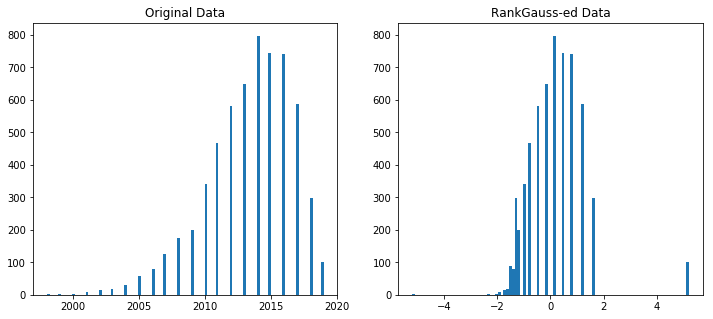

In [29]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['Year'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(df['Year_RankGauss'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()